<a href="https://colab.research.google.com/github/rammohanbadvelli/NLP-training/blob/main/NLP4_spacy_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spacy Language Processing Pipelines Tutorial**














Blank nlp pipeline

In [1]:
import spacy

nlp = spacy.blank("en")

doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


We get above error because we have a blank pipeline as shown below. Pipeline is something that starts with a Tokenizer component in a dotted rectange below. You can see there is nothing there hence the blank pipeline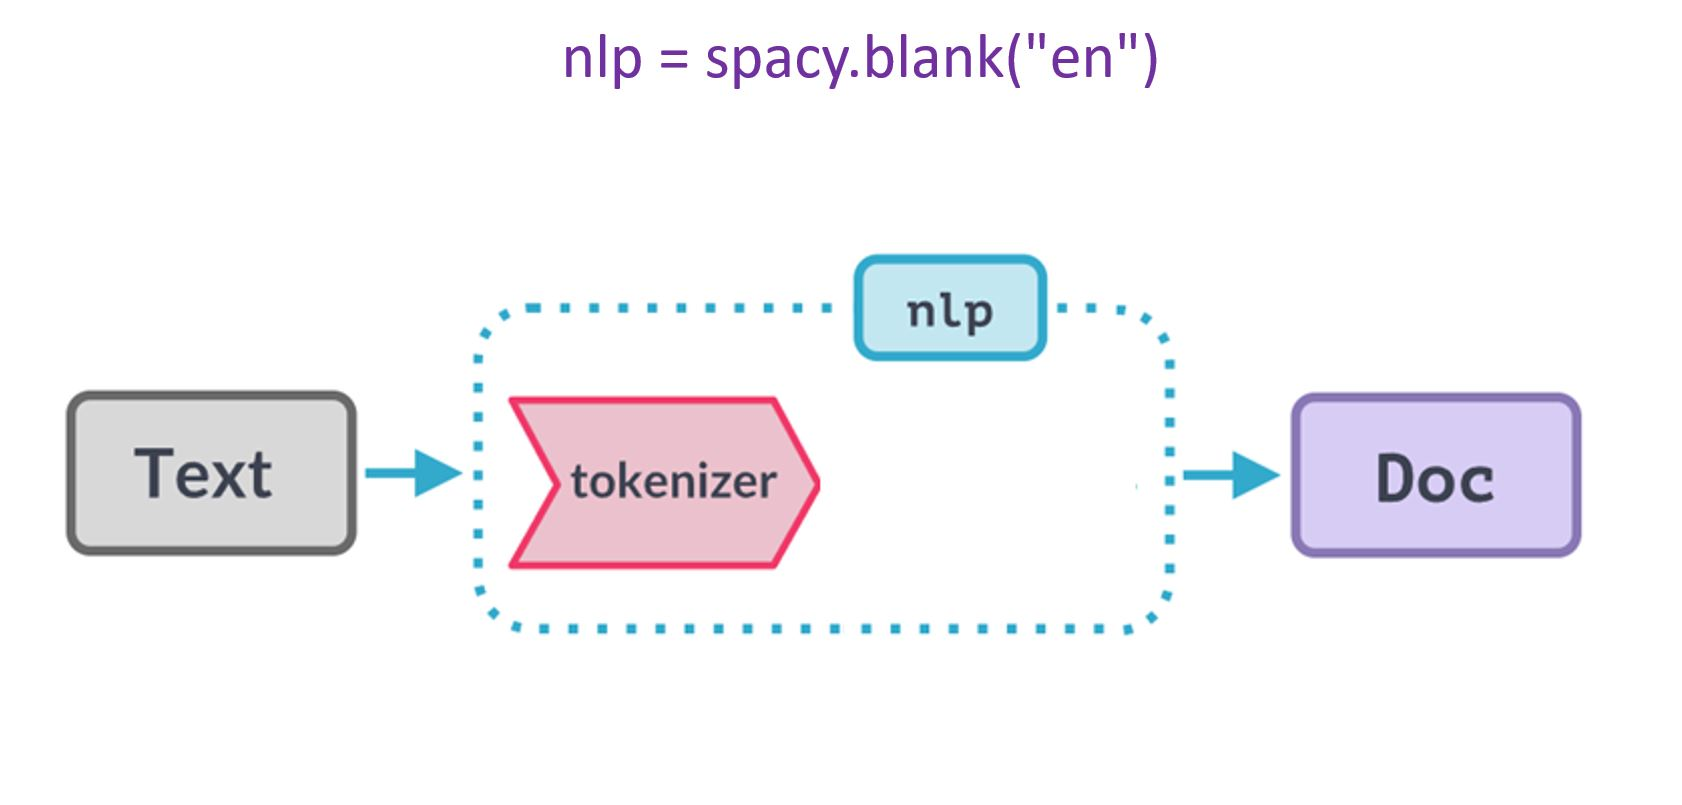



In [2]:
nlp.pipe_names

[]

nlp.pipe_names is empty array indicating no components in the pipeline. Pipeline is something that starts with a tokenizer

More general diagram for nlp pipeline may look something like below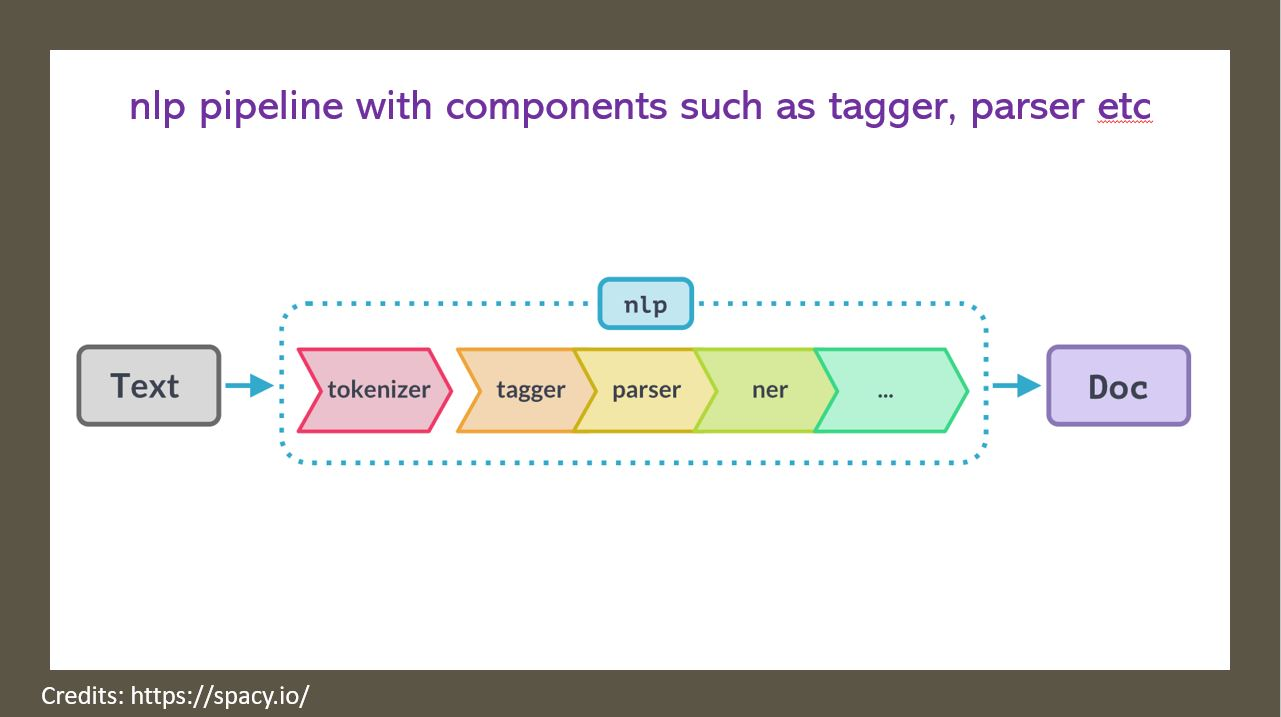

In [3]:
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [4]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fdbea5e3040>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fdbea5f47c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fdbea7e9430>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fdbea621340>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fdbea797d40>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fdbea7e96d0>)]

In [5]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token, " | ", spacy.explain(token.pos_), " | ", token.lemma_)

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  numeral  |  $
of  |  adposition  |  of
samosa  |  proper noun  |  samosa
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


## Named Entity Recognition

In [6]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


In [8]:
from spacy import displacy

displacy.render(doc, style="ent")


'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Tesla Inc\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n is going to acquire twitter for \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    $45 billion\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MONEY</span>\n</mark>\n</div>'

# Adding a component to a blank pipeline

In [9]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']